# En este ejercicio a calcular la importancia relativa de las features


In [ ]:
! # Instalamos el paquete desde el interprete de comandos, porque no se encuentra en el container
! pip install lxml

In [4]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics        import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]

df = pd.read_csv("datasets/equipos.csv")



In [5]:

df["Resultado"]   =  "Zona fria"
df["Resultado"].iloc[4:6]     = "Europa League"
df["Resultado"].iloc[0:4]     = "Champions League"
df["Resultado"].iloc[16:20]   = "Descenso"
df["Resultado"].iloc[6:16]    = "Zona fria"


,Equipo,PJ,PG,PE,PP,GF,GC,DIF,PTS,Resultado
0,Barcelona,31,24,7,0,79,16,63,79,Champions League
1,Atlético Madrid,31,20,8,3,51,15,36,68,Champions League
2,Valencia,31,20,5,6,59,31,28,65,Champions League
3,Real Madrid,31,19,7,5,77,34,43,64,Champions League
4,Betis,31,15,4,12,52,53,-1,49,Europa League
5,Villarreal,31,14,5,12,41,37,4,47,Europa League
6,Sevilla,31,14,4,13,39,50,-11,46,Zona fria
7,Girona,31,12,8,11,44,48,-4,44,Zona fria
8,Celta,31,12,7,12,50,43,7,43,Zona fria
9,Eibar,31,11,7,13,36,45,-9,40,Zona fria


In [6]:
# Quitamos la info innecesaria
del df["Equipo"]
df

,PJ,PG,PE,PP,GF,GC,DIF,PTS,Resultado
0,31,24,7,0,79,16,63,79,Champions League
1,31,20,8,3,51,15,36,68,Champions League
2,31,20,5,6,59,31,28,65,Champions League
3,31,19,7,5,77,34,43,64,Champions League
4,31,15,4,12,52,53,-1,49,Europa League
5,31,14,5,12,41,37,4,47,Europa League
6,31,14,4,13,39,50,-11,46,Zona fria
7,31,12,8,11,44,48,-4,44,Zona fria
8,31,12,7,12,50,43,7,43,Zona fria
9,31,11,7,13,36,45,-9,40,Zona fria


# Sacamos las distrubciones y el histograma, 

         PJ         PG         PE         PP         GF         GC        DIF  \
count  20.0  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   31.0  11.950000   7.100000  11.950000  41.500000  41.500000   0.000000   
std     0.0   5.500957   2.807884   5.462552  17.015473  12.763022  25.951372   
min    31.0   4.000000   2.000000   0.000000  19.000000  15.000000 -41.000000   
25%    31.0   8.750000   5.000000  10.750000  28.000000  34.750000 -14.000000   
50%    31.0  11.000000   7.000000  12.000000  37.500000  44.000000  -3.000000   
75%    31.0  14.250000   8.000000  14.250000  51.250000  48.500000   5.500000   
max    31.0  24.000000  13.000000  22.000000  79.000000  63.000000  63.000000   

             PTS  
count  20.000000  
mean   42.950000  
std    15.978522  
min    17.000000  
25%    35.750000  
50%    39.500000  
75%    47.500000  
max    79.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dcef31828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0dced2c390>]], dtype=object)

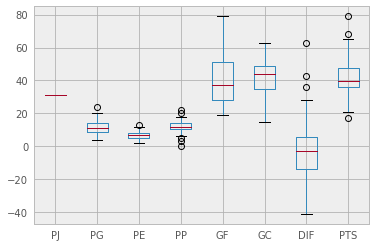

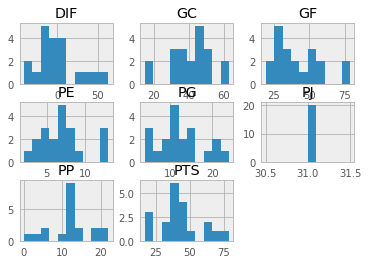

In [9]:
import matplotlib.pyplot as plt
print(df.describe())
pd.options.display.mpl_style = 'default'
df.boxplot()
df.hist()

## Seleccionamos las 3 Features mas importantes.


In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
  
NUM_COLUMNAS=df.shape[1]

array = df.values
X = array[:,0:NUM_COLUMNAS-1]
Y = array[:,NUM_COLUMNAS-1]

print("X:" , X)
print("Y:" , Y)

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

# Print results
print("Columnas: "          , df.columns      ) 
print("Num Features: "      , fit.n_features_ ) 
print("Selected Features: " , fit.support_    )
print("Feature Ranking: "   , fit.ranking_    )

X: [[31 24 7 0 79 16 63 79]
 [31 20 8 3 51 15 36 68]
 [31 20 5 6 59 31 28 65]
 [31 19 7 5 77 34 43 64]
 [31 15 4 12 52 53 -1 49]
 [31 14 5 12 41 37 4 47]
 [31 14 4 13 39 50 -11 46]
 [31 12 8 11 44 48 -4 44]
 [31 12 7 12 50 43 7 43]
 [31 11 7 13 36 45 -9 40]
 [31 10 9 12 35 30 5 39]
 [31 9 12 10 33 35 -2 39]
 [31 10 7 14 56 52 4 37]
 [31 10 6 15 26 39 -13 36]
 [31 8 12 11 26 38 -12 36]
 [31 11 2 18 28 45 -17 35]
 [31 6 13 12 28 45 -17 31]
 [31 5 8 18 29 63 -34 23]
 [31 5 6 20 22 63 -41 21]
 [31 4 5 22 19 48 -29 17]]
Y: ['Champions League' 'Champions League' 'Champions League'
 'Champions League' 'Europa League' 'Europa League' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Descenso' 'Descenso' 'Descenso' 'Descenso']
Columnas:  Index(['PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DIF', 'PTS', 'Resultado'], dtype='object')
Num Features:  3
Selected Features:  [False False  True False False False  True  True]
Feature Rankin

# Importancia relativa de la features

[ 0.          0.17113053  0.06873322  0.15817783  0.14839767  0.06785113
  0.06655778  0.31915185]


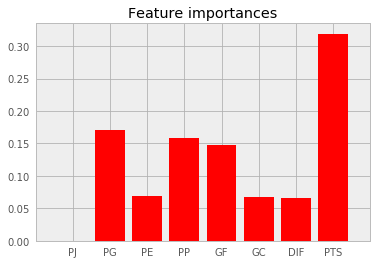

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_,
       color="r",  align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

Y si quitamos los puntos (que es un valor calculado a partir de otras columnas) 
¿ Qué features seran las mas importantes ? 

In [12]:
df_sinpuntos = df
del df_sinpuntos['PTS']

X: [[31 24 7 0 79 16 63]
 [31 20 8 3 51 15 36]
 [31 20 5 6 59 31 28]
 [31 19 7 5 77 34 43]
 [31 15 4 12 52 53 -1]
 [31 14 5 12 41 37 4]
 [31 14 4 13 39 50 -11]
 [31 12 8 11 44 48 -4]
 [31 12 7 12 50 43 7]
 [31 11 7 13 36 45 -9]
 [31 10 9 12 35 30 5]
 [31 9 12 10 33 35 -2]
 [31 10 7 14 56 52 4]
 [31 10 6 15 26 39 -13]
 [31 8 12 11 26 38 -12]
 [31 11 2 18 28 45 -17]
 [31 6 13 12 28 45 -17]
 [31 5 8 18 29 63 -34]
 [31 5 6 20 22 63 -41]
 [31 4 5 22 19 48 -29]]
Y: ['Champions League' 'Champions League' 'Champions League'
 'Champions League' 'Europa League' 'Europa League' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria' 'Zona fria'
 'Zona fria' 'Zona fria' 'Descenso' 'Descenso' 'Descenso' 'Descenso']
[ 0.          0.35864638  0.05761183  0.12765212  0.11449434  0.1266568
  0.21493852]


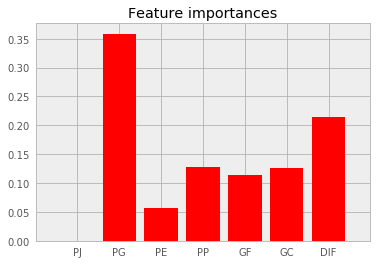

In [13]:


X = df_sinpuntos.values[:,0:7]
Y = df_sinpuntos.values[:,7]


print("X:" , X)
print("Y:" , Y)

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_,
       color="r",  align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
Conclusión, si no contamos los puntos que lleva el equpo, lo mas importante para predecir si un equipo ira a europa, descenderá , etc.
Son los partidos ganados PG , y meter mas goles de los que te meten DIF.
